# Prediction of the water Salinity depending on its Temperature.
source of datset: https://www.kaggle.com/datasets/sohier/calcofi
T_degC temperature in degree Celsius,  Salnty salinity in g of salt per kg of water (g/kg).

In [177]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [178]:
data= pd.read_csv('/Users/imac/Downloads/bottle.csv')
#data.info()
pd.set_option('display.max.columns', 75)
pd.set_option('display.max.rows', 200)
#data.describe()

df = data[['Salnty', 'T_degC']]
df.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


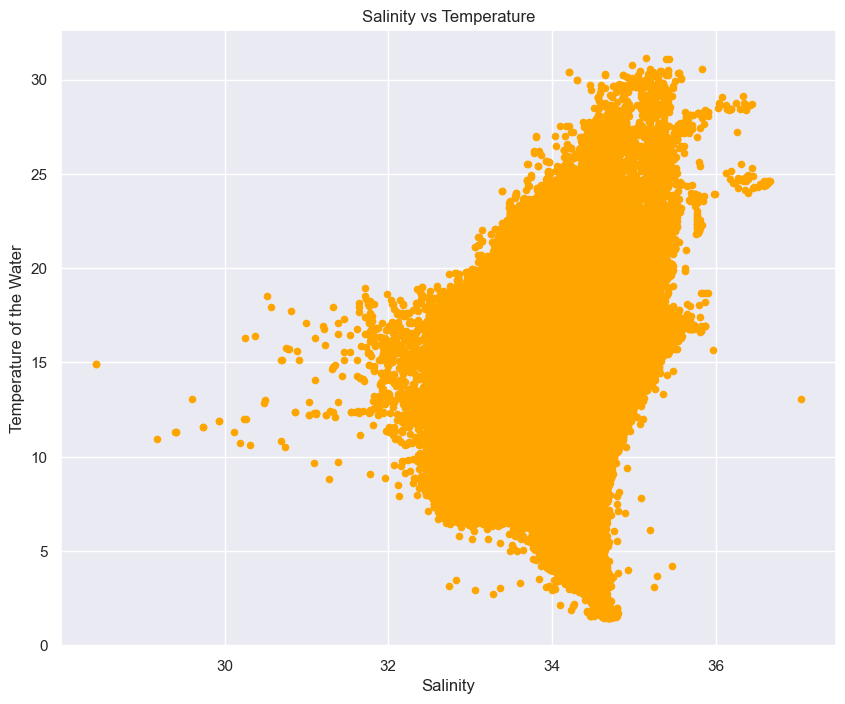

In [179]:
# plot columns
plt.figure(figsize=(10,8))
plt.scatter(df['Salnty'], df['T_degC'], s=20, color='orange')
plt.xlabel('Salinity')
plt.ylabel('Temperature of the Water')
plt.title('Salinity vs Temperature')
plt.show()

In [197]:
# subset
sample_df = df[:][:800]

# check how much data is missing in a subset
sample_df['Salnty'].isnull().sum() # 23 missing
sample_df['T_degC'].isnull().sum() # 2 missing 

# handling NaNs and duplicates
mean_salnty = round(sample_df['Salnty'].mean(),3)
mean_temp = round(sample_df['T_degC'].mean(),3)
sample_df['Salnty'].fillna(mean_salnty,inplace=True)
sample_df['T_degC'].fillna(mean_temp, inplace=True)
sample_df = sample_df.drop_duplicates(subset = ['Salnty', 'T_degC'])

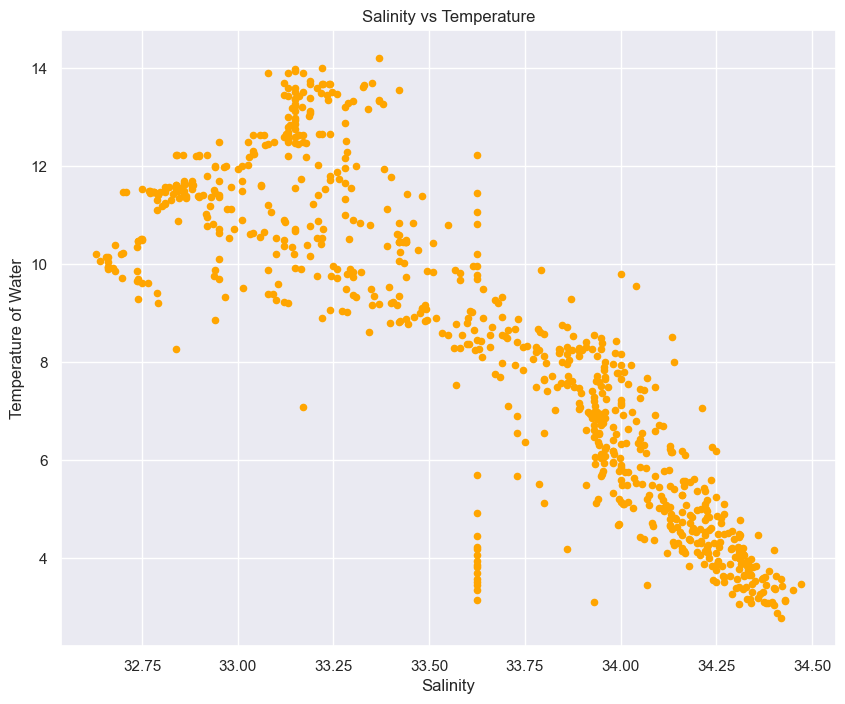

In [198]:
# plot sample_df
plt.figure(figsize=(10, 8))
plt.scatter(sample_df['Salnty'], sample_df['T_degC'],s=20, color='orange')
plt.xlabel('Salinity')
plt.ylabel('Temperature of Water')
plt.title('Salinity vs Temperature')
plt.show()

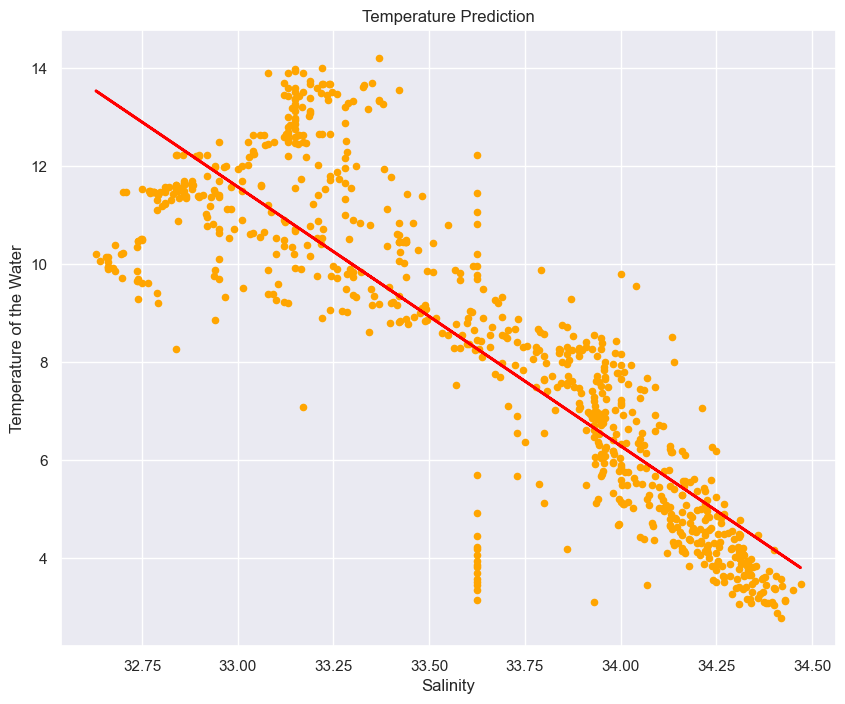

In [199]:
# linear regression
salinity = sample_df.iloc[:, 0:1].values 
temperature = sample_df.iloc[:, -1].values 

# fit a line
regression = LinearRegression()
regression.fit(salinity,temperature)

# plot
plt.figure(figsize=(10, 8))
plt.scatter(salinity,temperature, s=20, color='orange')
plt.plot(salinity,regression.predict(salinity), color='red', linewidth='2')
plt.xlabel('Salinity')
plt.ylabel('Temperature of the Water')
plt.title('Temperature Prediction')
plt.show()


In [200]:
# make prediction for the value
temp_pred = regression.predict([[35]])
temp_pred

array([1.00858713])

In [201]:
# checking R^2
temp = regression.predict(salinity)
print('R^2 score: ', r2_score(temperature,temp))

R^2 score:  0.7539473846029701
